<a href="https://colab.research.google.com/github/sujajohn26/sujajohn26.github.io/blob/main/OrderData_DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_csv('FactOrder.csv')
print(df.shape)
df

(1252860, 13)


,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered
0,94444500,1,31182,NaN,Övrigt,NaN,VAT,Base,NaN,NaN,NaN,20180102,1.0
1,94543600,2,47942,red,DRESSES LS WOVEN,116/122,DRESSES,Main,6[116-122],3 KIDS,NaN,20180103,1.0
2,94543600,3,6763,light grey,SWEATSHIRTS,92/98,TOPS,Main,4[92-98],2 TODDLER,NaN,20180103,1.0
3,94543700,1,20870,offwhite,TEES LS,80/86,TOPS,Main,3[80-86],2 TODDLER,NaN,20180103,1.0
4,94543700,2,38070,light grey,SWEATSHIRTS,80/86,TOPS,Main,3[80-86],2 TODDLER,NaN,20180103,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252855,116135100,3,56158,Blue,TEES LS,104/110,TOPS,Main,5[104-110],3 KIDS,JERSEY,20201223,1.0
1252856,116135100,4,33839,Blue,TROUSERS JERSEY,92/98,BOTTOMS,Main,4[92-98],2 TODDLER,JERSEY,20201223,1.0
1252857,116135100,5,54492,Offwhite,LEGGINGS,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,JERSEY,20201223,1.0
1252858,116135100,6,35487,Offwhite,TEES SS,104/110,TOPS,Pre,5[104-110],3 KIDS,JERSEY,20201223,1.0


In [ ]:
df.isnull().sum().sum()

305316

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252860 entries, 0 to 1252859
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   OrderNumber       1252860 non-null  int64  
 1   OrderRowNumber    1252860 non-null  int64  
 2   ArticleKey        1252860 non-null  int64  
 3   Colour            1238944 non-null  object 
 4   ArticleGenre      1252735 non-null  object 
 5   Size              1238927 non-null  object 
 6   ArticleGroupName  1252860 non-null  object 
 7   Collection        1252735 non-null  object 
 8   SizeGroup         1232844 non-null  object 
 9   BabyJunior        1232844 non-null  object 
 10  ArticleMaterial   1015675 non-null  object 
 11  DateOrderedKey    1252860 non-null  int64  
 12  QuantityOrdered   1252860 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 124.3+ MB


In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
df['DateOrderedKey'] = pd.to_datetime(df['DateOrderedKey'], format='%Y%m%d')


In [ ]:
df

,OrderNumber,OrderRowNumber,ArticleKey,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered
40,94545200,2,48537,brown,DRESSES SS,80/86,DRESSES,Main,3[80-86],2 TODDLER,RIB,2018-01-03,1.0
48,94545600,2,32371,brown,LEGGINGS,68/74,BOTTOMS,Main,2[68-74],1 BABY,RIB,2018-01-03,1.0
57,94545900,1,6993,brown,DRESSES SS,104/110,DRESSES,Main,5[104-110],3 KIDS,RIB,2018-01-03,1.0
73,94546400,1,32371,brown,LEGGINGS,68/74,BOTTOMS,Main,2[68-74],1 BABY,RIB,2018-01-03,1.0
97,94547000,3,42035,brown,BEANIES,56/58,HATS,Main,XHATS,4 JUNIOR,RIB,2018-01-03,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252855,116135100,3,56158,Blue,TEES LS,104/110,TOPS,Main,5[104-110],3 KIDS,JERSEY,2020-12-23,1.0
1252856,116135100,4,33839,Blue,TROUSERS JERSEY,92/98,BOTTOMS,Main,4[92-98],2 TODDLER,JERSEY,2020-12-23,1.0
1252857,116135100,5,54492,Offwhite,LEGGINGS,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,JERSEY,2020-12-23,1.0
1252858,116135100,6,35487,Offwhite,TEES SS,104/110,TOPS,Pre,5[104-110],3 KIDS,JERSEY,2020-12-23,1.0


In [ ]:
df_monthly = df.resample('M', on='DateOrderedKey').sum()

In [ ]:
df_monthly

,OrderNumber,OrderRowNumber,ArticleKey,QuantityOrdered
DateOrderedKey,,,,
2018-01-31,1397856560800,1775312,420182816,28555.0
2018-02-28,2253053689000,2083605,667310477,76263.0
2018-03-31,653962001200,161059,193107285,10973.0
2018-04-30,1524195831300,603746,470772846,39996.0
2018-05-31,557936723300,90206,164540562,11244.0
2018-06-30,1718818915400,1340300,506120050,29089.0
2018-07-31,3809843661400,4201655,1140132152,62784.0
2018-08-31,3991343415500,4399128,1206371653,129807.0
2018-09-30,868142977700,88031,244189436,11863.0


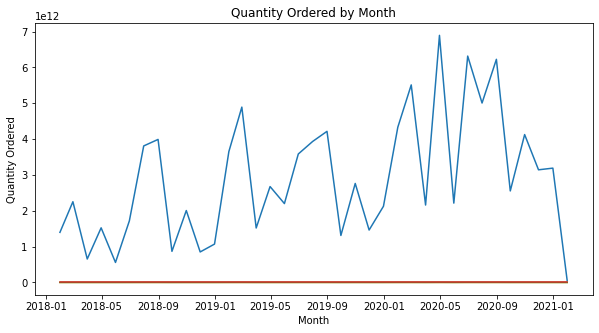

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_monthly)
plt.title('Quantity Ordered by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.show()
